In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('covid_toy.csv')

In [5]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [9]:
# df.isnull().sum()

In [13]:
from sklearn.impute import SimpleImputer

In [15]:
si = SimpleImputer()

In [17]:
df['fever']= si.fit_transform(df[['fever']])

In [21]:
# df.isnull().sum()

# LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
lb = LabelEncoder()

In [28]:
df['gender'] = lb.fit_transform(df['gender'])
df['cough'] = lb.fit_transform(df['cough'])
df['city'] = lb.fit_transform(df['city'])
df['has_covid'] = lb.fit_transform(df['has_covid'])

In [32]:
# df.head(2)

In [34]:
x = df.drop(columns = ['has_covid'])
y = df['has_covid']

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# OrdinalEncoding

In [64]:
df=pd.read_csv("covid_toy.csv")

In [66]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [68]:
df = df.drop(columns = ['age' , 'fever'])

In [70]:
from sklearn.preprocessing import OrdinalEncoder

In [72]:
oe = OrdinalEncoder(categories = [['Male' , 'Female'],
                                 ['Mild' , 'Strong'],
                                 ['Kolkata' , 'Bangalore' , 'Delhi' , 'Mumbai'],
                                 ['Yes' , 'No']])

In [74]:
oe_sc = oe.fit_transform(df)

In [78]:
new_df = pd.DataFrame(oe_sc , columns = df.columns)

In [80]:
new_df.head(2)

,gender,cough,city,has_covid
0,0.0,0.0,0.0,1.0
1,0.0,0.0,2.0,0.0


# OneHotEncoding

In [86]:
df.head(2)

,gender,cough,city,has_covid
0,Male,Mild,Kolkata,No
1,Male,Mild,Delhi,Yes


In [88]:
from sklearn.preprocessing import OneHotEncoder

In [90]:
ohe = OneHotEncoder(drop = 'first' , sparse_output = False , dtype = np.int32)

In [92]:
df_new = ohe.fit_transform(df[['gender' , 'cough' , 'city' , 'has_covid']])

In [94]:
df_new

array([[1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 1],
       [0, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 1],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
 

In [98]:
# df.head(2)

# GetDummies

In [109]:
df_new = pd.get_dummies(df , drop_first = True , columns = ['gender' , 'cough' , 'city' , 'has_covid'])

In [111]:
df_new.astype(int)

,gender_Male,cough_Strong,city_Delhi,city_Kolkata,city_Mumbai,has_covid_Yes
0,1,0,0,1,0,0
1,1,0,1,0,0,1
2,1,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
95,0,0,0,0,0,0
96,0,1,0,1,0,1
97,0,0,0,0,0,0
98,0,1,0,0,1,0


# ColumnTransformer

In [159]:
df=pd.read_csv("covid_toy.csv")

In [123]:
# df.head(2)

In [161]:
x = df.drop(columns = 'has_covid')
y = df['has_covid']

In [163]:
from sklearn.model_selection import train_test_split

In [165]:
x_train , x_test , y_train , y_test , = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [167]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [169]:
from sklearn.compose import ColumnTransformer 

transformer = ColumnTransformer(transformers=[
    ('tf1' , SimpleImputer() , ['fever']),
    ('tf2' , OrdinalEncoder(categories=[['Mild' , 'Strong']]) , ['cough']),
    ('tf3' , OneHotEncoder(sparse_output = False , drop = 'first') , ['gender' , 'city'])
],remainder = 'passthrough')

In [171]:
transformer.fit_transform(x_train).shape

(80, 7)

In [173]:
transformer.transform(x_test).shape

(20, 7)

# Outliers

In [335]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1


In [337]:
from sklearn.preprocessing import LabelEncoder

In [339]:
lb = LabelEncoder()

In [341]:
df['gender'] = lb.fit_transform(df['gender'])
df['cough'] = lb.fit_transform(df['cough'])
df['city'] = lb.fit_transform(df['city'])
df['has_covid'] = lb.fit_transform(df['has_covid'])

In [343]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='age'>

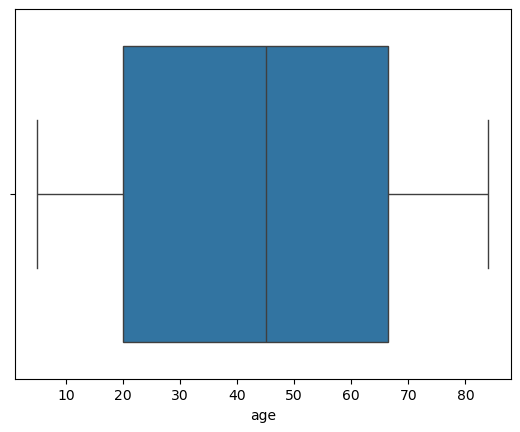

In [345]:
sns.boxplot(x = df['age'])

In [346]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)

In [349]:
percentile25

20.0

In [351]:
percentile75

66.5

In [353]:
IQR = percentile75 - percentile25

In [355]:
IQR

46.5

In [357]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

136.25

In [359]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

-49.75

In [361]:
df[df['age']> upper_limit]

,age,gender,fever,cough,city,has_covid


In [363]:
df[df['age']< lower_limit]

,age,gender,fever,cough,city,has_covid


In [365]:
newdf = df[df['age'] < upper_limit]

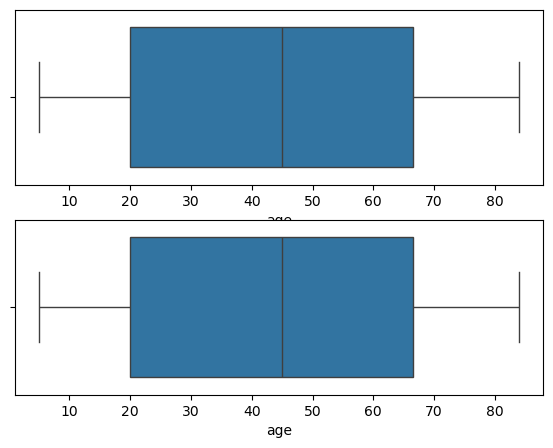

In [367]:
plt.figure(figsize = (15,5))


plt.subplot(222)
sns.boxplot(x = df['age'])


plt.subplot(224)
sns.boxplot(x = newdf['age'])
plt.show()

# PipeLine

In [371]:
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,1,103.0,0,2,0
1,27,1,100.0,0,1,1
